In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from pathlib import Path

In [3]:
GD = Path('/Users/mgjeon/Library/CloudStorage/GoogleDrive-A/My Drive/Notes/Work/PINN/')
NAS = Path('/Volumes/drive/Research/SSWLAB/NF2')

# Energy

In [4]:
csv_mine = GD / Path('ar_series_7115_2017-09-06T08:36:00/energy.csv')
df_mine = pd.read_csv(csv_mine, index_col=False)
bin = 2
cm_per_pixel = 360e5 * bin
dV = cm_per_pixel**3
energy_mine = (df_mine['energy_density']*dV)/1e33
date_mine = df_mine['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [5]:
csv_author = GD / Path('ar_series_7115_2017-09-06T08:36:00/energy_author.csv')
df_author = pd.read_csv(csv_author, index_col=False)
energy_author = (df_author['energy_density']*dV)/1e33
date_author = df_author['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [6]:
csvKusano = NAS / Path('NOAA12673/NOAA12673_Kusano.csv')
dfKusano = pd.read_csv(csvKusano, index_col=False)
dx_Mm = dfKusano['dx'][0]
dy_Mm = dfKusano['dy'][0]
dz_Mm = dfKusano['dz'][0]
dx_cm = dx_Mm*1e8
dy_cm = dy_Mm*1e8
dz_cm = dz_Mm*1e8
dV_cm3 = dx_cm*dy_cm*dz_cm
energy_Kusano = (dfKusano['energy_density']*dV_cm3)/1e33
date_Kusano = dfKusano['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

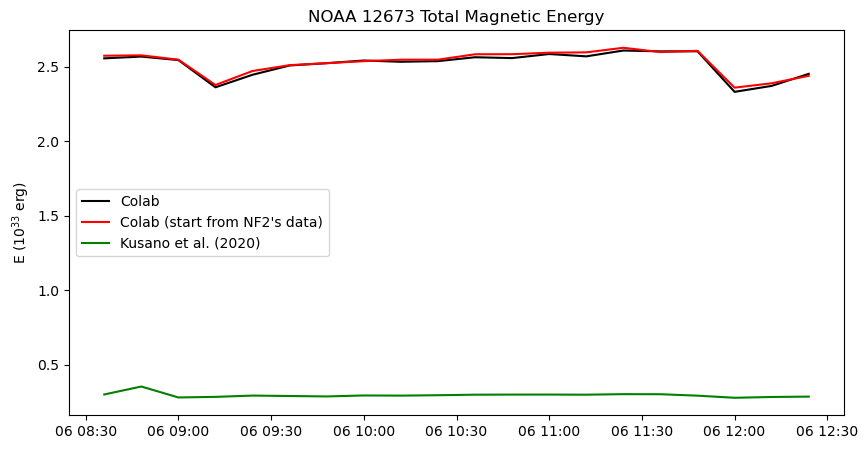

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(date_mine, energy_mine, label='Colab', color='k')
plt.plot(date_author, energy_author, label='Colab (start from NF2\'s data)', color='r')
plt.plot(date_Kusano, energy_Kusano, label='Kusano et al. (2020)', color='g')
plt.title('NOAA 12673 Total Magnetic Energy')
plt.ylabel(r'E ($10^{33}$ erg)')
plt.legend(loc='center left')
figure_energy_path = NAS / 'NOAA12673/12673_energy.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

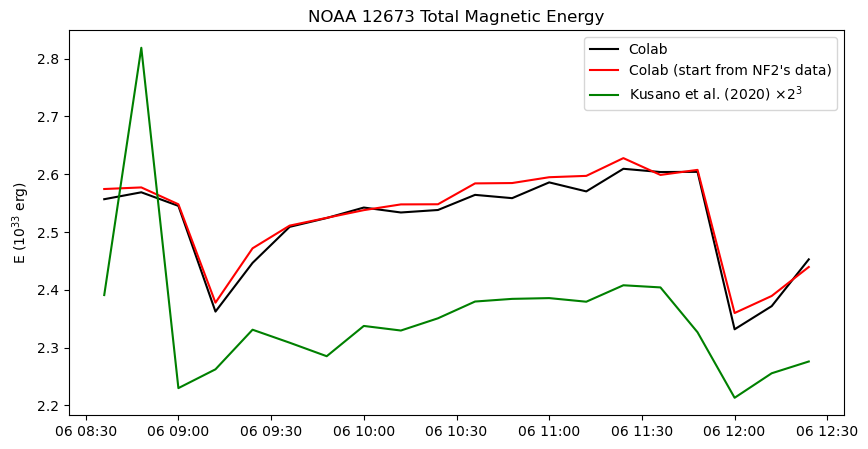

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(date_mine, energy_mine, label='Colab', color='k')
plt.plot(date_author, energy_author, label='Colab (start from NF2\'s data)', color='r')
plt.plot(date_Kusano, energy_Kusano*8, label=r'Kusano et al. (2020) $\times 2^3$', color='g')
plt.title('NOAA 12673 Total Magnetic Energy')
plt.ylabel(r'E ($10^{33}$ erg)')
plt.legend(loc='upper right')
figure_energy_path = NAS / 'NOAA12673/12673_energy_Kusano8.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

In [12]:
energy_mine = np.array(energy_mine)
energy_author = np.array(energy_author)
energy_Kusano = np.array(energy_Kusano)

In [13]:
print(energy_mine[0], energy_author[0], energy_Kusano[0])
print(date_mine[0], date_author[0], date_Kusano[0])

2.556679002624 2.5743056394240003 0.2988626588098822
2017-09-06 08:36:00 2017-09-06 08:36:00 2017-09-06 08:36:00


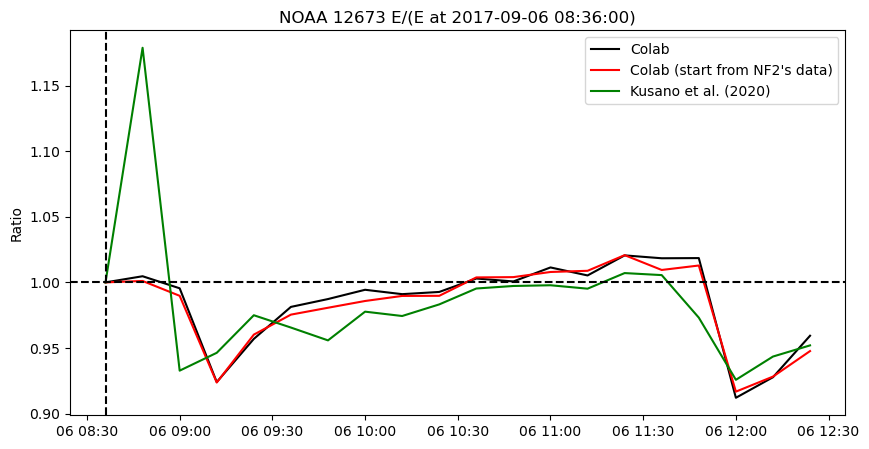

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(date_mine, energy_mine/energy_mine[0], label='Colab', color='k')
plt.plot(date_author, energy_author/energy_author[0], label='Colab (start from NF2\'s data)', color='r')
plt.plot(date_Kusano, energy_Kusano/energy_Kusano[0], label='Kusano et al. (2020)', color='g')
plt.title('NOAA 12673 E/(E at 2017-09-06 08:36:00)')
plt.ylabel('Ratio')
plt.legend(loc='upper right')
plt.axvline(date_mine[0], color='k', linestyle='dashed')
plt.axhline(1, color='k', linestyle='dashed')
figure_energy_path = NAS / 'NOAA12673/12673_energy_normalize.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

# Free Energy

In [15]:
free_energy_csv_mine = GD / Path('ar_series_7115_2017-09-06T08:36:00/free_energy.csv')
df_free_mine = pd.read_csv(free_energy_csv_mine, index_col=False)

free_energy_mine = (df_free_mine['free_energy_density']*dV)/1e33
free_date_mine = df_free_mine['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [16]:
free_energy_csv_author = GD / Path('ar_series_7115_2017-09-06T08:36:00/free_energy_author.csv')
df_free_author = pd.read_csv(free_energy_csv_author, index_col=False)

free_energy_author = (df_free_author['free_energy_density']*dV)/1e33
free_date_author = df_free_author['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [17]:
free_energy_Kusano = energy_Kusano - (dfKusano['energy_density_pot']*dV_cm3)/1e33

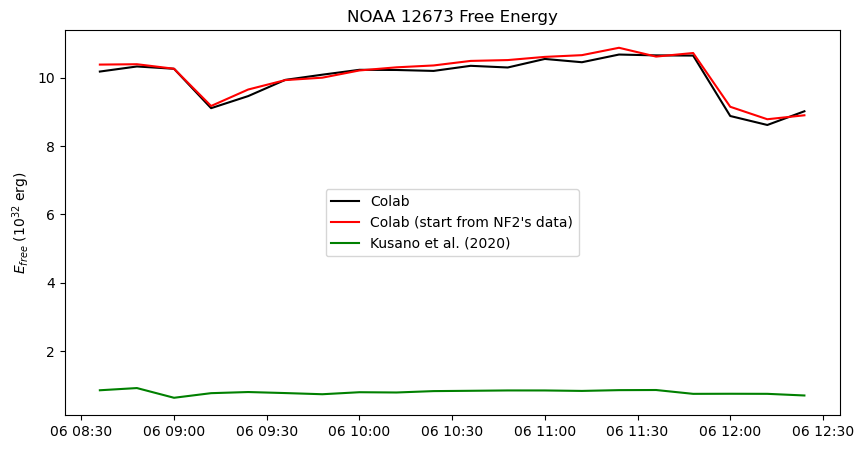

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(free_date_mine, free_energy_mine*10, label='Colab', color='k')
plt.plot(free_date_author, free_energy_author*10, label='Colab (start from NF2\'s data)', color='r')
plt.plot(date_Kusano, free_energy_Kusano*10, label='Kusano et al. (2020)', color='g')
plt.title('NOAA 12673 Free Energy')
plt.ylabel(r'$E_{free}$ ($10^{32}$ erg)')
plt.legend(loc='center')
figure_energy_path = NAS / 'NOAA12673/12673_free_energy.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

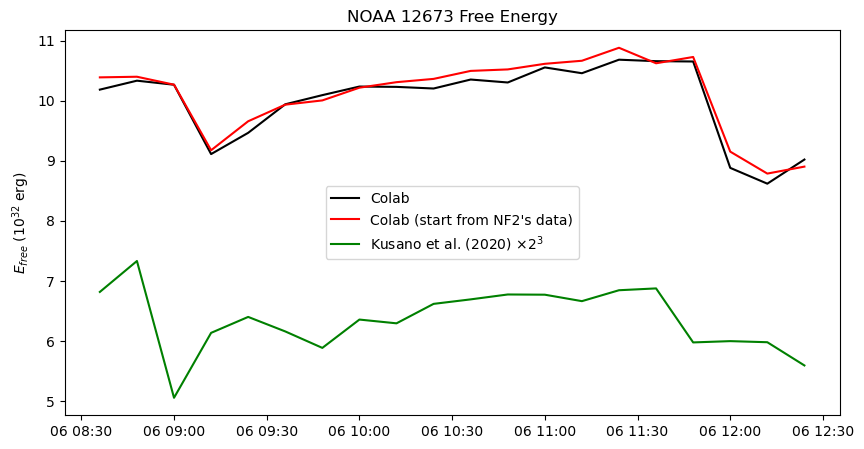

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(free_date_mine, free_energy_mine*10, label='Colab', color='k')
plt.plot(free_date_author, free_energy_author*10, label='Colab (start from NF2\'s data)', color='r')
plt.plot(date_Kusano, free_energy_Kusano*10*8, label=r'Kusano et al. (2020) $\times 2^3$', color='g')
plt.title('NOAA 12673 Free Energy')
plt.ylabel(r'$E_{free}$ ($10^{32}$ erg)')
plt.legend(loc='center')
figure_energy_path = NAS / 'NOAA12673/12673_free_energy_Kusano8.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

In [21]:
free_energy_mine = np.array(free_energy_mine)
free_energy_author = np.array(free_energy_author)
free_energy_Kusano = np.array(free_energy_Kusano)

<Figure size 1000x500 with 0 Axes>

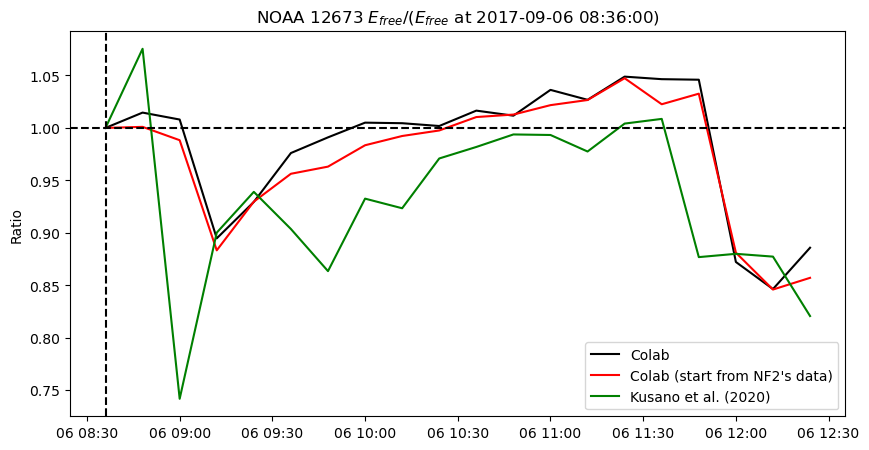

In [22]:
plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 5))
plt.plot(free_date_mine, free_energy_mine/free_energy_mine[0], label='Colab', color='k')
plt.plot(free_date_author, free_energy_author/free_energy_author[0], label='Colab (start from NF2\'s data)', color='r')
plt.plot(date_Kusano, free_energy_Kusano/free_energy_Kusano[0], label='Kusano et al. (2020)', color='g')
plt.title(r'NOAA 12673 $E_{free}$/($E_{free}$ at 2017-09-06 08:36:00)')
plt.ylabel('Ratio')
plt.legend(loc='lower right')
plt.axvline(date_mine[0], color='k', linestyle='dashed')
plt.axhline(1, color='k', linestyle='dashed')
figure_energy_path = NAS / 'NOAA12673/12673_free_energy_normalize.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()